In [1]:
import pandas as pd 
import numpy as np


import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
Ga_spectrum = pd.read_csv('RF_on_top/Ga68.xls','Sheet 1', delimiter =' ', header = None, 
                 skiprows = 16, names =['del','Channel','Energy','Counts'],
                 usecols = ['Channel','Counts'])

Tc_spectrum = pd.read_csv('RF_on_top/Tc99m.xls','Sheet 1', delimiter =' ', header = None, 
                 skiprows = 16, names =['del','Channel','Energy','Counts'],
                 usecols = ['Channel','Counts'])

I_spectrum = pd.read_csv('RF_on_top/I131.xls','Sheet 1', delimiter =' ', header = None, 
                 skiprows = 16, names =['del','Channel','Energy','Counts'],
                 usecols = ['Channel','Counts'])

Lu_spectrum = pd.read_csv('RF_on_top/Lu177.xls','Sheet 1', delimiter =' ', header = None, 
                 skiprows = 16, names =['del','Channel','Energy','Counts'],
                 usecols = ['Channel','Counts'])

Ra_spectrum = pd.read_csv('RF_on_top/Ra223.xls','Sheet 1', delimiter =' ', header = None, 
                 skiprows = 16, names =['del','Channel','Energy','Counts'],
                 usecols = ['Channel','Counts'])

Ac_spectrum = pd.read_csv('RF_on_top/Ac225.xls','Sheet 1', delimiter =' ', header = None, 
                 skiprows = 16, names =['del','Channel','Energy','Counts'],
                 usecols = ['Channel','Counts'])

In [3]:
### Concatenar todos los espectros
df = pd.concat([Ga_spectrum, Tc_spectrum, I_spectrum, Lu_spectrum, Ra_spectrum,
                Ac_spectrum], ignore_index=True)
se = pd.Series(['Ga68']*1024+['Tc99m']*1024+['I131']*1024+['Lu177']*1024+['Ra223']*1024
               +['Ac225']*1024)
df['RN'] = se.values
#df

In [4]:
##### Máximo de cuentas 
test=df.groupby(['RN'],as_index=False).max()
test

,RN,Channel,Counts
0,Ac225,1023,126986
1,Ga68,1023,3113
2,I131,1023,134096
3,Lu177,1023,138387
4,Ra223,1023,246207
5,Tc99m,1023,125979


In [5]:
dRN = pd.merge(df,test[['RN','Counts']],on ='RN')
#dRN

In [6]:
dRN = dRN.rename(columns={"Counts_x": "Counts", "Counts_y": "CMax"})
### Normalización de cuentas en los espectros
dRN['NC'] = dRN['Counts']/dRN['CMax']

<Figure size 1080x648 with 0 Axes>

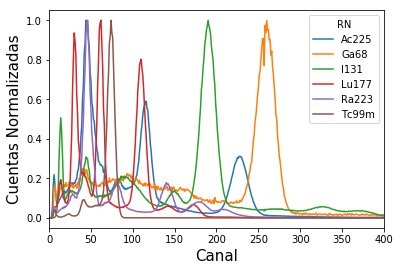

In [8]:
plt.figure(figsize=(15,9))
table = dRN.pivot(index ='Channel',columns ='RN',values='NC')
table.plot()
plt.xlabel('Canal',size=15)
plt.ylabel('Cuentas Normalizadas',size=15)
plt.xlim([0,400])
#plt.savefig('EspectroRN.pdf')

In [82]:
table_sum = dRN.pivot_table(index ='Channel',columns ='RN',values='NC',aggfunc=np.sum,margins=True)
ready = table_sum.iloc[:-1]

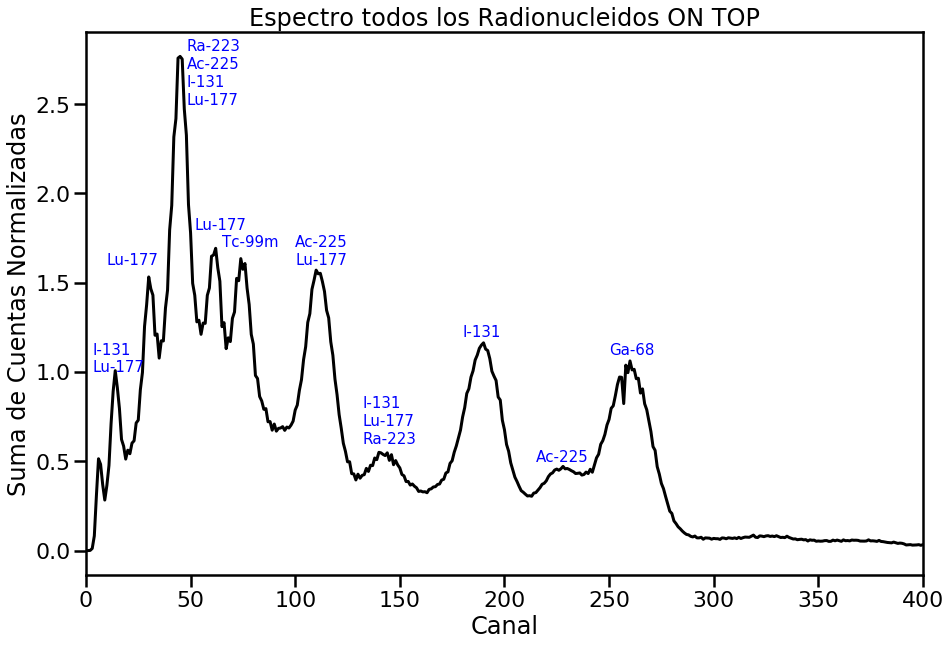

In [252]:
#### Graficar Espectro y fondo 
plt.figure(figsize=(15,10))
Canal = ready.index
Fondo = ready['All']
plt.plot(Canal,Fondo,'k')
plt.xlabel('Canal')
plt.ylabel('Suma de Cuentas Normalizadas')
plt.title('Espectro todos los Radionucleidos ON TOP')

plt.text(250,1.1,'Ga-68',size=15,color='blue')
plt.text(215,0.5,'Ac-225',size=15,color='blue')
plt.text(180,1.2,'I-131',size=15,color='blue')

plt.text(132,0.6,'Ra-223',size=15,color='blue')
plt.text(132,0.7,'Lu-177',size=15,color='blue')
plt.text(132,0.8,'I-131',size=15,color='blue')

plt.text(100,1.6,'Lu-177',size=15,color='blue')
plt.text(100,1.7,'Ac-225',size=15,color='blue')
plt.text(65,1.7,'Tc-99m',size=15,color='blue')
plt.text(52,1.8,'Lu-177',size=15,color='blue')
plt.text(48,2.8,'Ra-223',size=15,color='blue')
plt.text(48,2.7,'Ac-225',size=15,color='blue')
plt.text(48,2.6,'I-131',size=15,color='blue')
plt.text(48,2.5,'Lu-177',size=15,color='blue')
plt.text(10,1.6,'Lu-177',size=15,color='blue')
plt.text(3,1.1,'I-131',size=15,color='blue')
plt.text(3,1.0,'Lu-177',size=15,color='blue')


plt.xlim([0,400])
#plt.savefig('Espectro_suma.pdf')

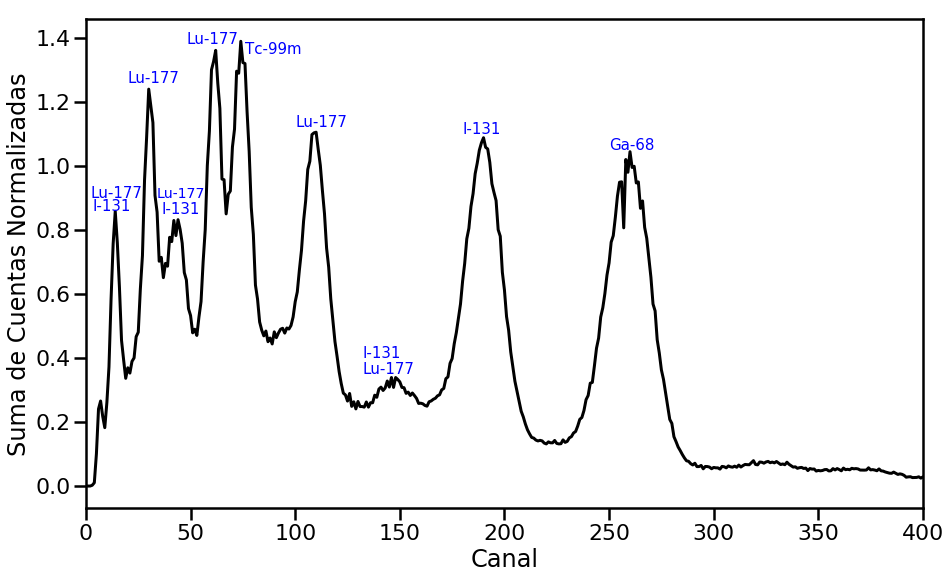

In [249]:
#### Graficar Espectros
plt.figure(figsize=(15,9))

Canal = ready.index


#### Yodo 131
#plt.plot(Canal,ready['I131'],'b',label='I-131')

#### Lutecio 177
#plt.plot(Canal,ready['Lu177'],'orange',label='Lu-177')

#### Tecnecio 99m
#plt.plot(Canal,ready['Tc99m'],'g',label='Tc-99m')

#### Galio 68
#plt.plot(Canal,ready['Ga68'],'r',label='Ga-68')

#### Suma I-131 y Lu-177
#plt.plot(Canal,ready['I131']+ready['Lu177'],'k')


#### Suma I-131, Lu-177 y Tc-99m
#plt.plot(Canal,ready['I131']+ready['Lu177']+ready['Tc99m'],'k')


#### Suma I-131, Lu-177, Tc-99m y Ga-68
plt.plot(Canal,ready['I131']+ready['Lu177']+ready['Tc99m']+ready['Ga68'],'k')

plt.text(3,0.86,'I-131',size=15,color='blue')
plt.text(2,0.9,'Lu-177',size=15,color='blue')
plt.text(20,1.26,'Lu-177',size=15,color='blue')
plt.text(34,0.9,'Lu-177',size=14,color='blue')
plt.text(36,0.85,'I-131',size=15,color='blue')
plt.text(48,1.38,'Lu-177',size=15,color='blue')
plt.text(76,1.35,'Tc-99m',size=15,color='blue')
plt.text(100,1.12,'Lu-177',size=15,color='blue')
plt.text(132,0.35,'Lu-177',size=15,color='blue')
plt.text(132,0.4,'I-131',size=15,color='blue')
plt.text(180,1.1,'I-131',size=15,color='blue')
plt.text(250,1.05,'Ga-68',size=15,color='blue')



#plt.legend()

plt.xlabel('Canal')
#plt.ylabel('Cuentas Normalizadas')
plt.xlim([0,400])
plt.ylabel('Suma de Cuentas Normalizadas')

#plt.savefig('Combina_suma.pdf')

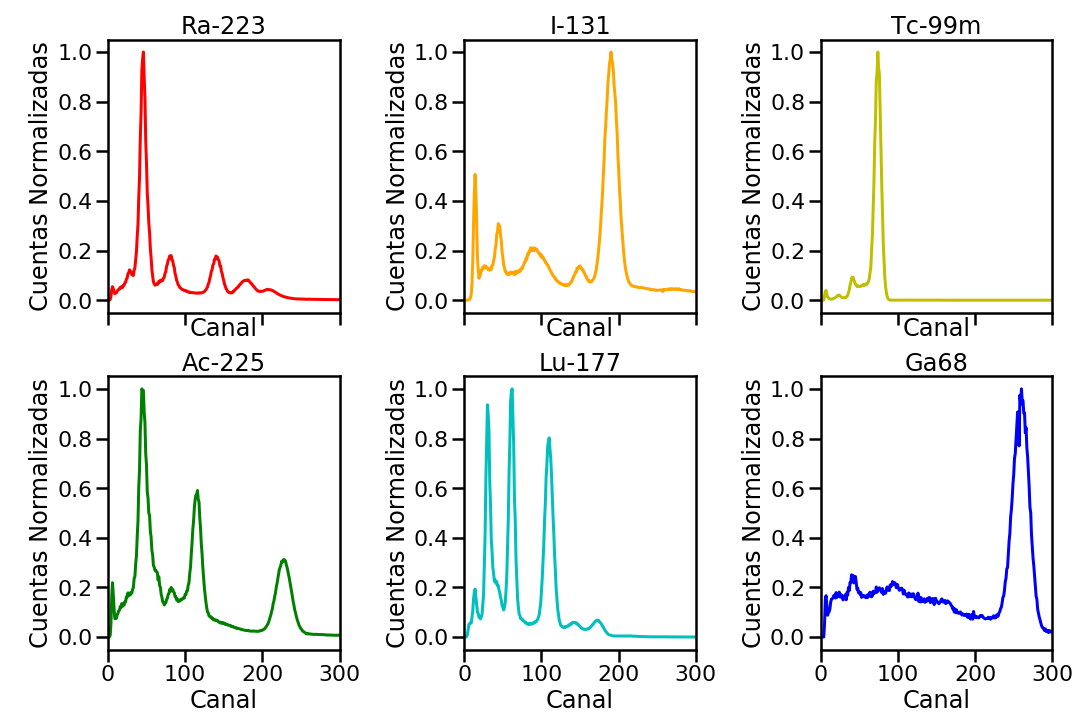

In [266]:
fig, axs = plt.subplots(2, 3, sharex='col',figsize=(15,10), constrained_layout=True)

#plt.figure(figsize=(12,8))

axs[0, 0].plot(Canal, ready['Ra223'],'r')
axs[0, 0].set_title("Ra-223")
axs[0, 1].plot(Canal, ready['I131'],'orange')
axs[0, 1].set_title("I-131")
#axs[1, 0].sharex(axs[0, 0])
axs[0, 2].plot(Canal, ready['Tc99m'],'y')
axs[0, 2].set_title("Tc-99m")
axs[1, 0].plot(Canal, ready['Ac225'],'g')
axs[1, 0].set_title("Ac-225")
axs[1, 1].plot(Canal, ready['Lu177'],'c')
axs[1, 1].set_title("Lu-177")
axs[1, 2].plot(Canal, ready['Ga68'],'b')
axs[1, 2].set_title("Ga68")




for ax in axs.flat:
    ax.set_xlim([0, 300])
    ax.set(xlabel='Canal', ylabel='Cuentas Normalizadas')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
    #ax.label_outer()

    
    
fig.tight_layout()

#fig.savefig('Radiofarmacos.pdf')